In [1]:
import numpy as np
import pandas as pd
from os import listdir

In [2]:
household_info = pd.read_csv("../data/raw/informations_households.csv")

In [25]:
## Future
import os
import glob

path = "../data/raw/daily_dataset/"
allFiles = glob.glob(os.path.join(path,"*.csv"))


np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
block_daily = pd.DataFrame(comb_np_array)

block_daily.columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min']

/home/rob/anaconda3/envs/smlondon/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [26]:
block_daily = pd.merge(block_daily, household_info)

In [27]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000019,2011-12-07,0.1805,0.2335,0.874,18,0.184434,4.203,0.119,Std,ACORN-K,Adversity,block_76
1,MAC000019,2011-12-08,0.1365,0.163021,0.805,48,0.149069,7.825,0.018,Std,ACORN-K,Adversity,block_76
2,MAC000019,2011-12-09,0.1345,0.167312,1.106,48,0.176914,8.031,0.016,Std,ACORN-K,Adversity,block_76
3,MAC000019,2011-12-10,0.1285,0.143354,0.728,48,0.123578,6.881,0.017,Std,ACORN-K,Adversity,block_76
4,MAC000019,2011-12-11,0.1195,0.166688,1.038,48,0.194749,8.001,0.018,Std,ACORN-K,Adversity,block_76


In [28]:
block_daily['day'] = pd.to_datetime(block_daily['day'])

In [29]:
block_daily.isnull().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
stdorToU             0
Acorn                0
Acorn_grouped        0
file                 0
dtype: int64

In [30]:
block_daily.drop('energy_std', axis = 1, inplace = True)

In [31]:
block_daily.isnull().sum()

LCLid             0
day               0
energy_median    30
energy_mean      30
energy_max       30
energy_count      0
energy_sum       30
energy_min       30
stdorToU          0
Acorn             0
Acorn_grouped     0
file              0
dtype: int64

In [32]:
block_daily.dropna(inplace = True)

In [33]:
block_daily.isnull().sum()

LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_sum       0
energy_min       0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

In [34]:
block_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510403 entries, 0 to 3510432
Data columns (total 12 columns):
LCLid            object
day              datetime64[ns]
energy_median    object
energy_mean      object
energy_max       object
energy_count     object
energy_sum       object
energy_min       object
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtypes: datetime64[ns](1), object(11)
memory usage: 348.2+ MB


In [35]:
block_daily['energy_median'] = block_daily['energy_median'].astype('float')
block_daily['energy_mean'] = block_daily['energy_mean'].astype('float')
block_daily['energy_max'] = block_daily['energy_max'].astype('float')
block_daily['energy_count'] = block_daily['energy_count'].astype('int')
block_daily['energy_sum'] = block_daily['energy_sum'].astype('float')
block_daily['energy_min'] = block_daily['energy_min'].astype('float')

In [36]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000019,2011-12-07,0.1805,0.233500,0.874,18,4.203,0.119,Std,ACORN-K,Adversity,block_76
1,MAC000019,2011-12-08,0.1365,0.163021,0.805,48,7.825,0.018,Std,ACORN-K,Adversity,block_76
2,MAC000019,2011-12-09,0.1345,0.167312,1.106,48,8.031,0.016,Std,ACORN-K,Adversity,block_76
3,MAC000019,2011-12-10,0.1285,0.143354,0.728,48,6.881,0.017,Std,ACORN-K,Adversity,block_76
4,MAC000019,2011-12-11,0.1195,0.166688,1.038,48,8.001,0.018,Std,ACORN-K,Adversity,block_76


In [15]:
block_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510403 entries, 0 to 3510432
Data columns (total 12 columns):
LCLid            object
day              datetime64[ns]
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count     int64
energy_sum       float64
energy_min       float64
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 348.2+ MB


In [45]:
block_daily['Acorn_grouped'].value_counts()

Affluent       1407678
Adversity      1135331
Comfortable     937061
ACORN-U          29552
ACORN-             781
Name: Acorn_grouped, dtype: int64

In [74]:
block_daily.drop(block_daily[(block_daily.Acorn_grouped == 'ACORN-U') | (block_daily.Acorn_grouped == 'ACORN-') ].index, inplace=True)

In [87]:
block_daily = block_daily[(block_daily.day >  '07-01-2012')]

## Visualize

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})

(0, 1)

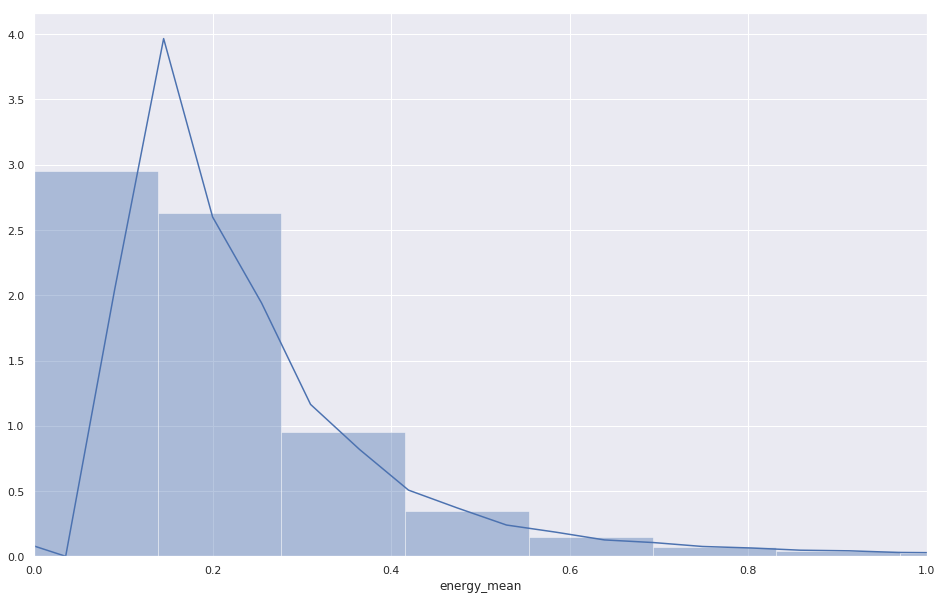

In [89]:
sns.distplot(block_daily['energy_mean'])
plt.xlim(0,1)

In [90]:
grouped_block_daily_count = block_daily.groupby(['day', 'Acorn_grouped'])['energy_count'].count()

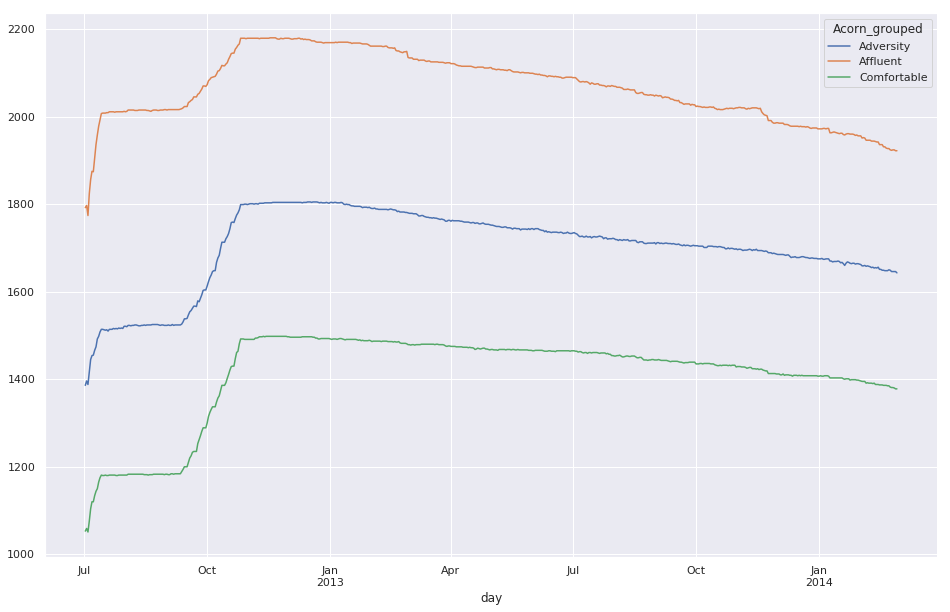

In [91]:
grouped_block_daily_count.unstack().plot()

In [92]:
##Total amount consumed per group per day
grouped_block_daily_sum = block_daily.groupby(['day', 'Acorn_grouped'])['energy_sum'].sum()

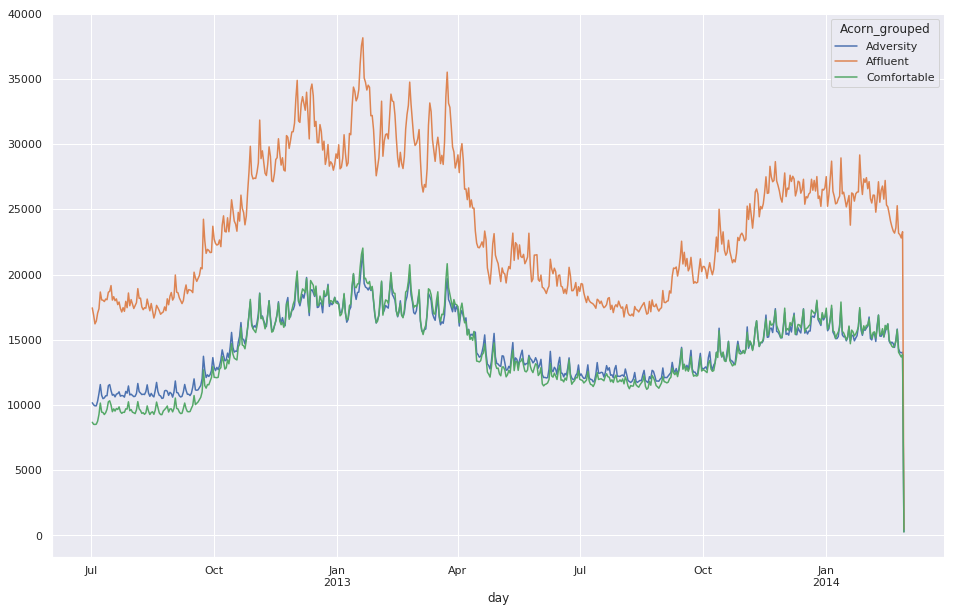

In [93]:
grouped_block_daily_sum.unstack().plot()

In [94]:
##Average amount consumed per group per day
grouped_block_daily_average = block_daily.groupby(['day', 'Acorn_grouped'])['energy_sum'].mean()

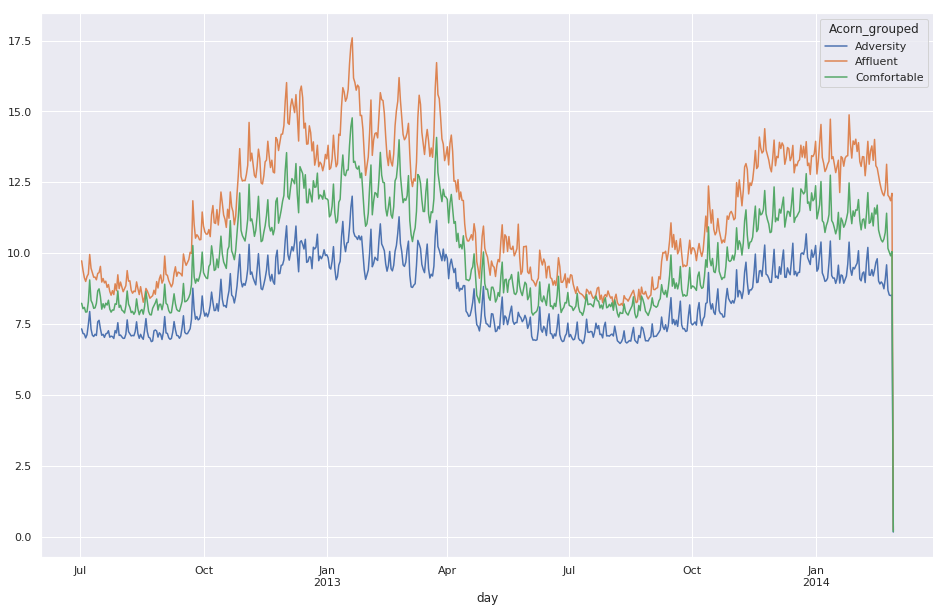

In [95]:
grouped_block_daily_average.unstack().plot()

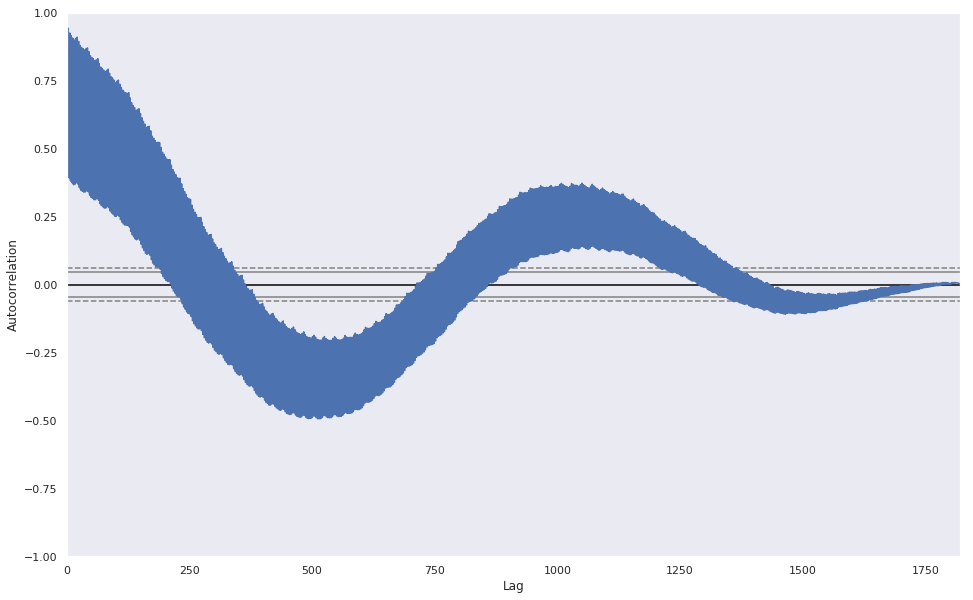

In [98]:
pd.plotting.autocorrelation_plot(grouped_block_daily_average)
plt.show()

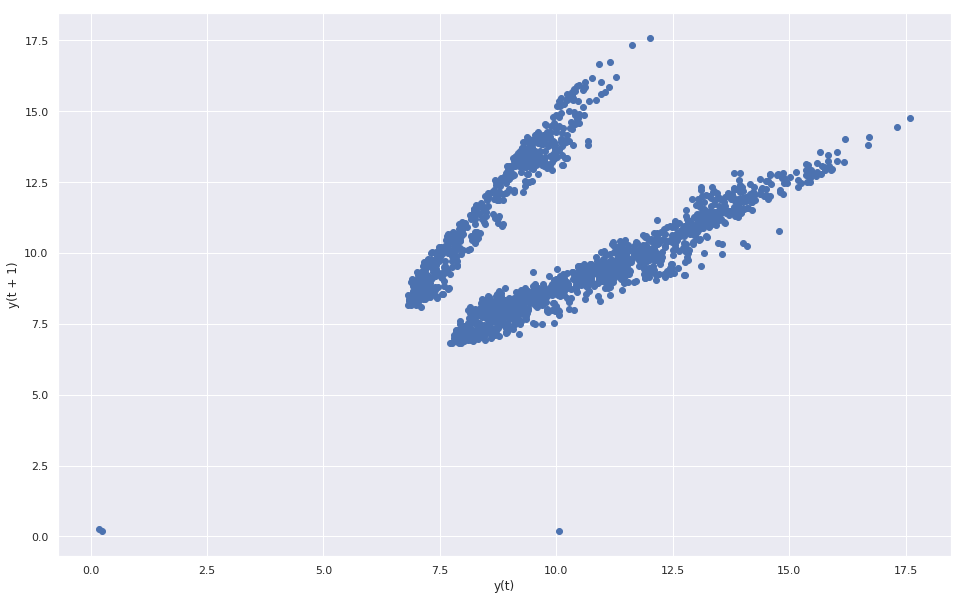

In [99]:
pd.plotting.lag_plot(grouped_block_daily_average)
plt.show()